In [48]:
import pandas as pd
df = pd.read_csv('/content/AAPL.csv') #importing data
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [49]:
df1=df.reset_index()['close']
dfx=df.reset_index() #selecting the 'close' columns
df1=dfx['close']
df1.tail()


,close
1253,314.96
1254,313.14
1255,319.23
1256,316.85
1257,318.89


[132.045 131.78  130.28  ... 319.23  316.85  318.89 ]


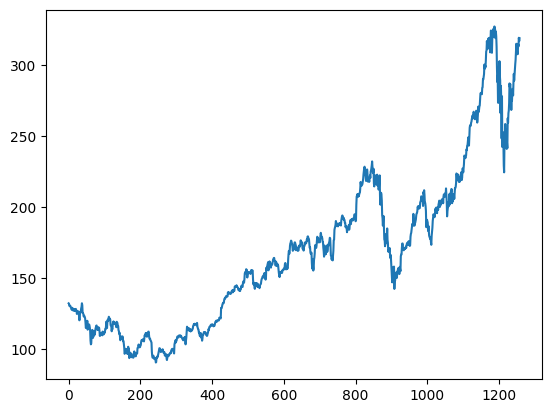

In [50]:
import matplotlib.pyplot as plt
plt.plot(df1)
x=np.array(df1)
print(x)

Non-normalized data
[132.045 131.78  130.28  ... 319.23  316.85  318.89 ]
Normalized data and rearranged data
[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


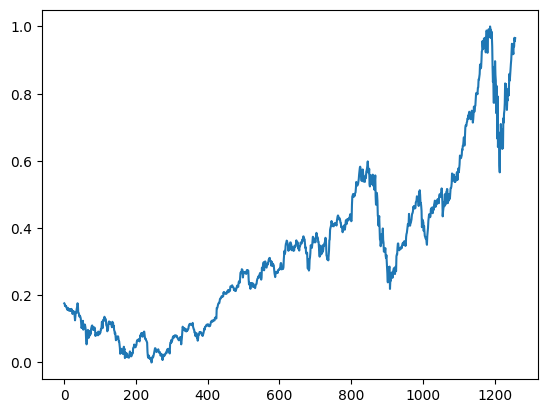

In [51]:
## minmaxscaler() used as LSTM sensitive to scale of data
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
print("Non-normalized data",end='\n')
print(x)
df1=scaler.fit_transform(x.reshape(-1,1)) #normalizes df1 dataframe and turns it into an array of 1257 rows and 4 columns
print("Normalized data and rearranged data",end='\n')
print(df1)
plt.plot(df1) #the graph of the closing price of each day

In [94]:
##splitting dataset into train and test split. Time series data can't be split randomly
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [77]:
len(train_data),len(test_data)


(817, 441)

In [78]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
 # reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [79]:
# reshape input to be [samples, time steps, features] which is required for LSTM i.e. convert to 3-D
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed,Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')




In [80]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - loss: 6.9528e-05 - val_loss: 8.8488e-04
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - loss: 7.2024e-05 - val_loss: 0.0012
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 7.4370e-05 - val_loss: 9.1575e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 7.2665e-05 - val_loss: 9.0925e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - loss: 7.2401e-05 - val_loss: 9.7626e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 8.2025e-05 - val_loss: 9.0321e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 7.6118e-05 - val_loss: 0.0011
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 6.9658e-05 - val_loss: 9.1823e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 6.4035e-05 - val_loss: 9.3336e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - loss: 6.7008e-05 - val_loss: 9.5626e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - l

In [81]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)



23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [82]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.17036266596978

In [83]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

235.9715126867909

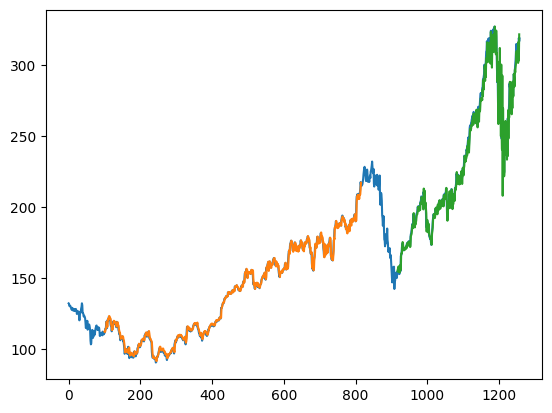

In [84]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [99]:
x_input=test_data[341:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [86]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1




[0.9711921]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

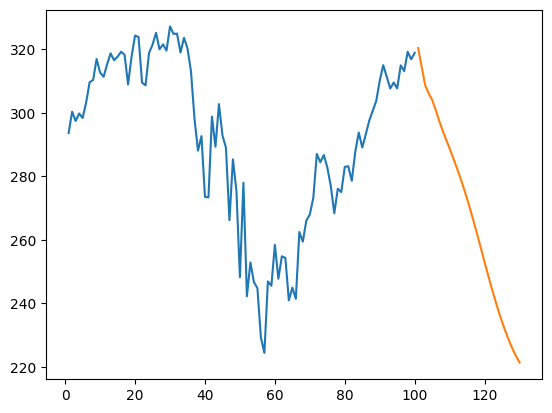

In [87]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


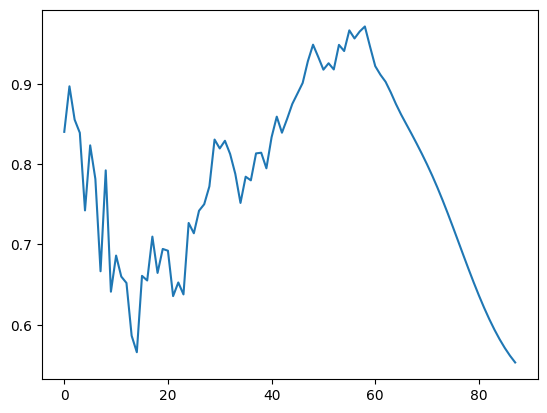

In [88]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


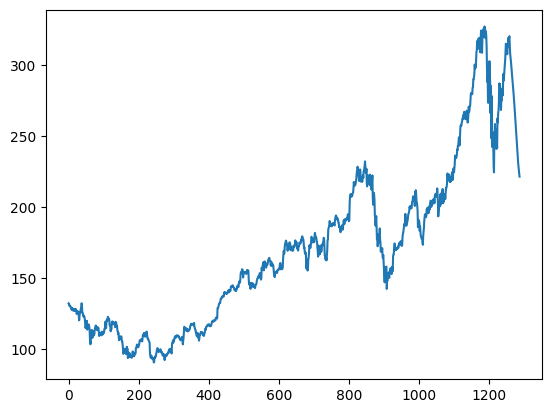

In [89]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)